<a href="https://colab.research.google.com/github/Saeed2761989/Diabetes/blob/main/W25_C01_Custom_Assignment_Saeed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Analyzing Diabetes Risk with Logistic Regression**

In this project, we explore a well-known medical dataset to build a model that predicts diabetes in patients based on health-related variables. Using the Pima Indians Diabetes dataset, which includes information such as glucose levels, BMI, age, and family history, we aim to classify whether a patient is likely to have diabetes. Logistic Regression was chosen as a starting algorithm to evaluate model performance, identify key features, and understand how training size impacts accuracy.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("https://raw.githubusercontent.com/Saeed2761989/Diabetes/refs/heads/main/diabetes.csv")

print(data.isnull().sum())

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = data[features]
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mn_scaler = MinMaxScaler()
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = mn_scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test = mn_scaler.transform(X_test)

model = LogisticRegression(penalty="elasticnet", solver="saga", random_state=42, max_iter=1000, l1_ratio=0.5)
model.fit(X_train, y_train)



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


LogisticRegression(l1_ratio=0.5, max_iter=1000, penalty='elasticnet',
                   random_state=42, solver='saga')

### **How accurately does logistic regression predict diabetes onset?**

Accuracy: 0.7662337662337663

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.83        99
           1       0.70      0.60      0.65        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



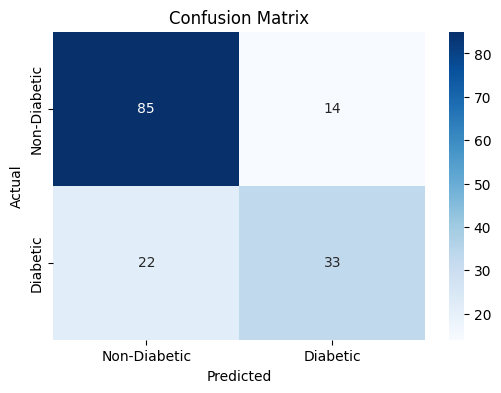

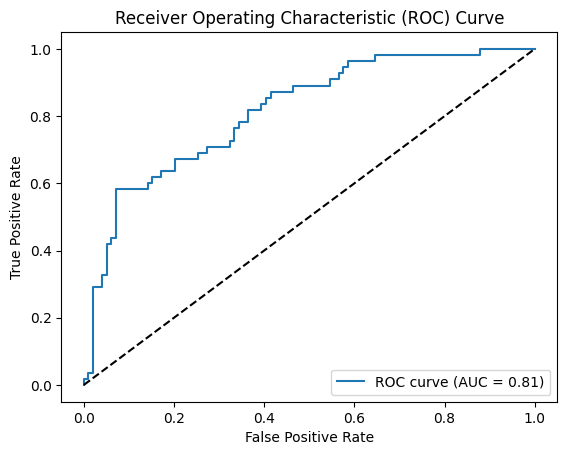

In [2]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non-Diabetic", "Diabetic"],
            yticklabels=["Non-Diabetic", "Diabetic"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

**Evaluation of Logistic Regression Model**

This section evaluates the performance of the logistic regression model on the test set:

- **Accuracy**: The model achieved ~76.62% accuracy in predicting diabetes.
- **Classification Report**: Shows precision, recall, and F1-score for both diabetic and non-diabetic classes. The diabetic class has slightly lower recall, indicating some diabetic cases were misclassified.
- **Confusion Matrix**: Visual representation of prediction outcomes:
  - 85 true negatives (non-diabetic correctly identified)
  - 33 true positives (diabetic correctly identified)
  - 22 false negatives
  - 14 false positives
- **ROC Curve & AUC**: The ROC curve assesses model discrimination ability. An AUC of **0.81** indicates good performance at distinguishing between diabetic and non-diabetic patients.

These metrics help understand the model's strengths and areas for improvement.


### **Which features are the most influential in predicting the onset of diabetes?**

Feature Importance based on Coefficients:
                     Feature  Coefficient  AbsCoefficient
1                   Glucose     4.933270        4.933270
5                       BMI     4.009402        4.009402
7                       Age     1.773025        1.773025
6  DiabetesPedigreeFunction     1.115109        1.115109
0               Pregnancies     0.931119        0.931119
2             BloodPressure    -0.605152        0.605152
4                   Insulin    -0.288826        0.288826
3             SkinThickness     0.063409        0.063409


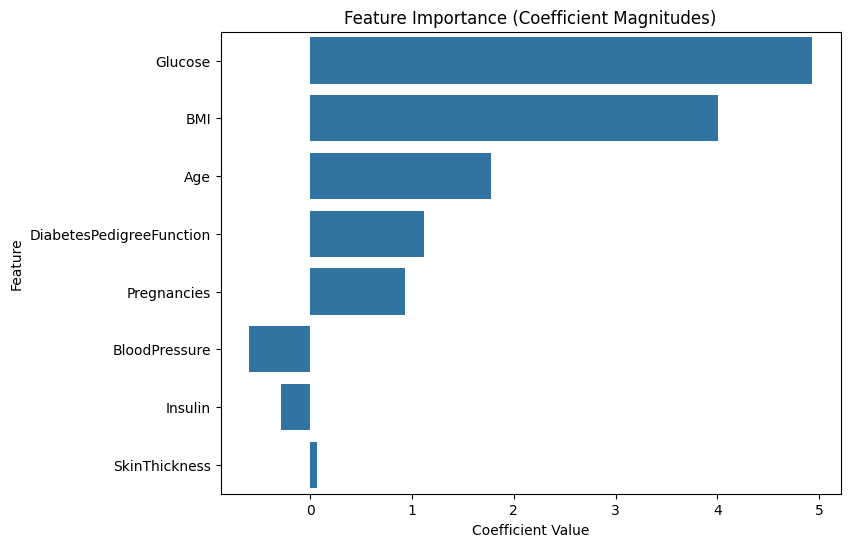

In [3]:
coefficients = model.coef_[0]

feature_importance = pd.DataFrame({
    "Feature": features,
    "Coefficient": coefficients,
    "AbsCoefficient": np.abs(coefficients)
})

feature_importance = feature_importance.sort_values(by="AbsCoefficient", ascending=False)
print("Feature Importance based on Coefficients:\n", feature_importance)

plt.figure(figsize=(8,6))
sns.barplot(x="Coefficient", y="Feature", data=feature_importance)
plt.title("Feature Importance (Coefficient Magnitudes)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

**Explanation of Feature Importance Analysis**

This section retrieves the coefficients of the logistic regression model and analyzes the impact of each feature on diabetes prediction. The coefficients represent the strength and direction of influence of each feature.

- A higher absolute value of a coefficient indicates greater influence.
- Positive coefficients increase the likelihood of predicting diabetes.
- Negative coefficients decrease the likelihood.

The bar plot visualizes the magnitude of each coefficient, helping us identify the most influential features. According to the results:
- **Glucose** is the most important predictor, followed by **BMI** and **Age**.
- **SkinThickness** and **Insulin** have the least impact on the model's predictions.


### **How does the training set size affect model performance?**

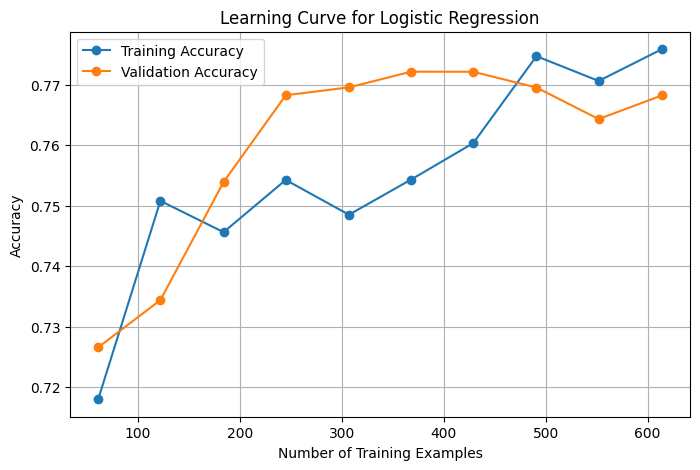

In [4]:
from sklearn.model_selection import learning_curve

scaler = StandardScaler()
mn_scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)
X_scaled = mn_scaler.fit_transform(X_scaled)

train_sizes, train_scores, test_scores = learning_curve(
    model, X_scaled, y, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, marker='o', label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, marker='o', label='Validation Accuracy')
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy")
plt.title("Learning Curve for Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()


**Explanation of Learning Curve**

This section analyzes how the training set size affects the logistic regression model's performance.

- The **learning curve** shows both training and validation accuracy as the number of training samples increases.
- Initially, training accuracy is high and validation accuracy is low, indicating overfitting with small data.
- As more training examples are added, validation accuracy improves and stabilizes, showing better generalization.
- The gap between training and validation accuracy narrows, suggesting the model benefits from more data and is learning effectively.

This visualization helps assess whether adding more data could improve model performance.
